In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/'
prots = pd.read_csv(workdir + '20230423_prot_conc_.csv')

for i in range(len(prots.columns)):
    print(str(i) + ' ' + prots.columns[i])

0 Wavelength [nm]
1 HBST_398
2 599_2
3 599_4
4 599_6
5 599_8
6 599_10
7 599_12
8 TBS1
9 29N_2
10 29N_4
11 29N_6
12 29N_8
13 29N_10
14 29N_12
15 TBS2
16 131N_2
17 131N_4
18 131N_6
19 131N_8
20 131N_10
21 131N_12
22 TBS3
23 Nir599_2
24 Nir599_4
25 Nir599_6
26 Nir599_8
27 Nir599_10
28 Nir599_12
29 TBS4
30 F123A_2
31 F123A_4
32 F123A_6
33 F123A_8
34 F123A_10
35 F123A_12


In [25]:
def auto_zero(protdb):
    for name in protdb.columns[1:]:
        #print(protdb.columns)
        x = protdb[name][310:410]  - protdb[protdb.columns[0]][310:410]
        y = sum(x)/len(x)
        protdb[name] = protdb[name] - y
    return protdb


def get_conc(prot, bfactor):
    xs = [0, 2/400, 4/402, 6/404, 8/406, 10/408, 12/410]
    xs_re = np.array(xs).reshape(-1, 1)


    ys_280 = prot.iloc[280-190, :]
    reg_280 = LinearRegression().fit(xs_re, ys_280)
    print('R: {}'.format(reg_280.score(xs_re, ys_280)))
    print('intercept_: {}'.format(reg_280.intercept_))

    ys_280_corr = ys_280 - reg_280.intercept_
    prot_conc = ys_280_corr/bfactor*1000*1000

    factors = [400/2, 402/4, 404/6, 406/8, 408/10, 410/12]
    prot_conc_stock = []

    for i in range(6):
        prot_conc_stock.append(prot_conc[i+1]*factors[i])

    print(prot_conc_stock)
    print(np.mean(prot_conc_stock[1:]))


    fig,ax = plt.subplots()
    ax.scatter(xs_re, ys_280)
    ax.plot(xs_re, ys_280)
    plt.xlim([0, 0.04])
    plt.ylim([-0.05, 1.5])
    return prot_conc_stock, np.mean(prot_conc_stock[1:])

In [21]:

prot599_HBST = prots[prots.columns[1:8]]
prot29N = prots[prots.columns[8:15]]
prot131N = prots[prots.columns[15:22]]
protNir599 = prots[prots.columns[22:29]]
protF123A = prots[prots.columns[29:36]]

#print(prot599_HBST.iloc[280-190, 1])


prot599_HBST = auto_zero(prot599_HBST)
prot29N = auto_zero(prot29N)
prot131N = auto_zero(prot131N)
protNir599 = auto_zero(protNir599)
protF123A = auto_zero(protF123A)

#print(prot599_HBST.iloc[280-190, 1])


/tmp/ipykernel_1215/4170092121.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protdb[name] = protdb[name] - y


R: 0.9996367266680357
intercept_: 0.0014224262173381796
[1622.0896242882138, 1725.3111954148658, 1731.951943823364, 1705.2405230036748, 1685.9073397983477, 1687.4106364265851]
1707.1643276933676
R: 0.9998549026432255
intercept_: -0.003291888075136279
[1311.0798850214098, 1241.230657095073, 1240.6751589260623, 1252.5229290039124, 1255.44869206375, 1250.3464392362023]
1248.044775265
R: 0.9999564197083158
intercept_: -0.00792007745683257
[1108.6888331557154, 1113.8261960371947, 1104.251364097302, 1101.8767822011007, 1102.8392488876268, 1110.352565374526]
1106.62923131955
R: 0.9999863696874624
intercept_: -0.00975532409157806
[1206.1330858930976, 1186.0786055856058, 1185.3614845049876, 1187.5910167832112, 1189.7707836726167, 1189.225914647664]
1187.605561038817
R: 0.9990049853251615
intercept_: -0.013773106082865097
[537.1927184998472, 515.78315191876, 517.4562180699807, 534.9915169260929, 537.678361977212, 540.2582019354871]
529.2334901655066


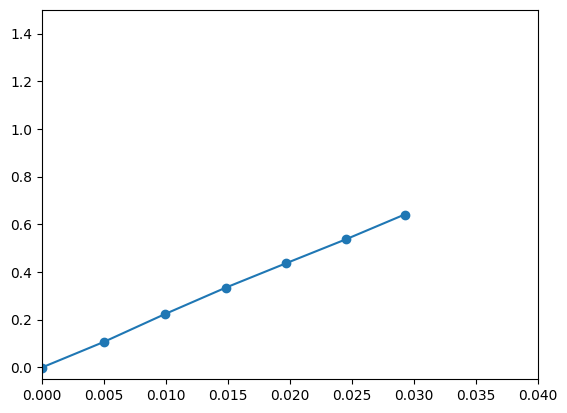

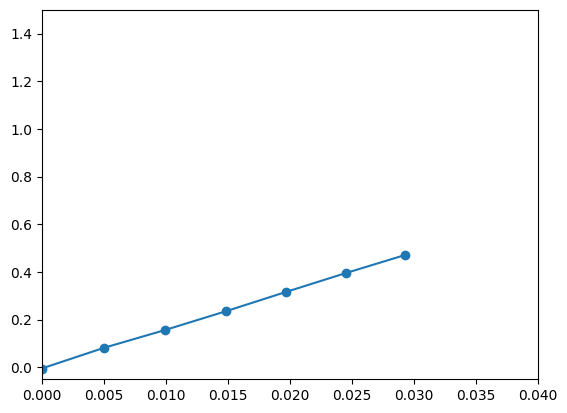

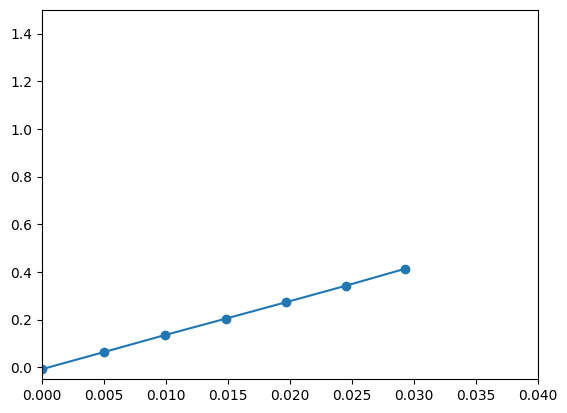

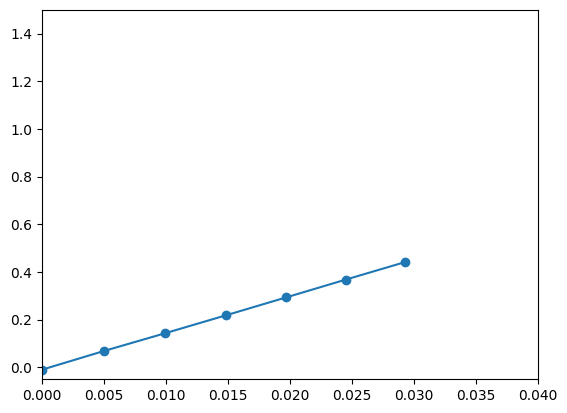

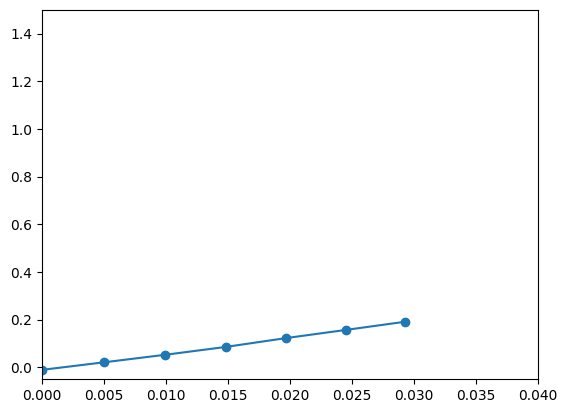

In [26]:

prot599_HBST_concs, prot599_HBST_conc = get_conc(prot599_HBST, bfactor=12950)
prot29N_HBST_concs, prot29N_conc = get_conc(prot29N, bfactor=12950)
prot131N_concs, prot131N_conc = get_conc(prot131N, bfactor=12950)
protNir599_concs, protNir599_conc = get_conc(protNir599, bfactor=12950)
protF123A_concs, protF123A_conc = get_conc(protF123A, bfactor=12950)